In [55]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Download T-Note from Yahoo Finance**

In [56]:
start_date = "1970-01-01"
end_date = "2024-12-31"

#下载标普500数据
ticker_sp500 = "^GSPC"
#下载T-Note 10Y数据
ticker_TNOTE = "^TNX"


In [57]:
SP500_DF = yf.download(ticker_sp500, start=start_date, end=end_date)
TNOTE_DF = yf.download(ticker_TNOTE, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
SP500_DF.to_csv("../data/raw/SP500_1970.csv")
TNOTE_DF.to_csv("../data/raw/TNOTE.csv")

**Process SP500 and AGG data**

In [59]:
sp500_daily = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Daily")
sp500_daily.columns = sp500_daily.iloc[4]
sp500_daily = sp500_daily.iloc[5:]
sp500_daily.columns.name = None
sp500_daily.reset_index(drop=True, inplace=True)
sp500_daily.set_index("Dates", inplace=True)
sp500_daily = sp500_daily.dropna(subset=['PX_LAST'])
sp500_daily['SPXret_1d'] = sp500_daily['PX_LAST'].pct_change()

sp500_quarterly = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Quarterly")
sp500_quarterly.columns = sp500_quarterly.iloc[4]
sp500_quarterly = sp500_quarterly.iloc[5:]
sp500_quarterly.columns.name = None
sp500_quarterly.reset_index(drop=True, inplace=True)
sp500_quarterly.set_index("Dates", inplace=True)
sp500_quarterly = sp500_quarterly.dropna(subset=['PX_LAST'])
sp500_quarterly['SPXret_1q'] = sp500_quarterly['PX_LAST'].pct_change()

sp500_semi_annual = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Semi Annually")
sp500_semi_annual.columns = sp500_semi_annual.iloc[4]
sp500_semi_annual = sp500_semi_annual.iloc[5:]
sp500_semi_annual.columns.name = None
sp500_semi_annual.reset_index(drop=True, inplace=True)
sp500_semi_annual.set_index("Dates", inplace=True)
sp500_semi_annual = sp500_semi_annual.dropna(subset=['PX_LAST'])
sp500_semi_annual['SPXret_s'] = sp500_semi_annual['PX_LAST'].pct_change()

sp500_annual = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Yearly")
sp500_annual.columns = sp500_annual.iloc[4]
sp500_annual = sp500_annual.iloc[5:]
sp500_annual.columns.name = None
sp500_annual.reset_index(drop=True, inplace=True)
sp500_annual.set_index("Dates", inplace=True)
sp500_annual = sp500_annual.dropna(subset=['PX_LAST'])
sp500_annual['SPXret_a'] = sp500_annual['PX_LAST'].pct_change()

In [60]:
AGG_quarterly = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Quarterly")
AGG_quarterly.columns = AGG_quarterly.iloc[4]
AGG_quarterly = AGG_quarterly.iloc[5:]
AGG_quarterly.columns.name = None
AGG_quarterly.reset_index(drop=True, inplace=True)
AGG_quarterly.set_index("Dates", inplace=True)
AGG_quarterly = AGG_quarterly.dropna(subset=['PX_LAST'])
AGG_quarterly['AGGret_1q'] = AGG_quarterly['PX_LAST'].pct_change()

AGG_semi_annual = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Semi Annually")
AGG_semi_annual.columns = AGG_semi_annual.iloc[4]
AGG_semi_annual = AGG_semi_annual.iloc[5:]
AGG_semi_annual.columns.name = None
AGG_semi_annual.reset_index(drop=True, inplace=True)
AGG_semi_annual.set_index("Dates", inplace=True)
AGG_semi_annual = AGG_semi_annual.dropna(subset=['PX_LAST'])
AGG_semi_annual['AGGret_s'] = AGG_semi_annual['PX_LAST'].pct_change()

AGG_annual = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Yearly")
AGG_annual.columns = AGG_annual.iloc[4]
AGG_annual = AGG_annual.iloc[5:]
AGG_annual.columns.name = None
AGG_annual.reset_index(drop=True, inplace=True)
AGG_annual.set_index("Dates", inplace=True)
AGG_annual = AGG_annual.dropna(subset=['PX_LAST'])
AGG_annual['AGGret_a'] = AGG_annual['PX_LAST'].pct_change()

**Sampling from T-Note**

In [61]:
TNOTE_DF.columns = TNOTE_DF.columns.droplevel(1)

In [62]:
TNX_quarterly = TNOTE_DF.resample('Q').last()
TNX_quarterly['TNXret_1q'] = TNX_quarterly['Close'].pct_change()
TNX_quarterly = TNX_quarterly.dropna(subset=['TNXret_1q'])

TNX_semi_annual = TNOTE_DF.resample('Q', convention='end').last()
TNX_semi_annual = TNX_semi_annual[TNX_semi_annual.index.month.isin([6, 12])]
TNX_semi_annual['TNXret_s'] = TNX_semi_annual['Close'].pct_change()
TNX_semi_annual = TNX_semi_annual.dropna(subset=['TNXret_s'])

TNX_annual = TNOTE_DF.resample('A').last()
TNX_annual['TNXret_a'] = TNX_annual['Close'].pct_change()
TNX_annual = TNX_annual.dropna(subset=['TNXret_a'])

In [63]:
sp500_semi_annual.head()

,PX_LAST,CHG_PCT_1D,PX_CLOSE_1D,SPXret_s
Dates,,,,
1976-06-30,104.28,15.62,90.19,NaN
1976-12-31,107.46,3.05,104.28,0.030495
1977-06-30,100.48,-6.5,107.46,-0.064954
1977-12-30,95.1,-5.35,100.48,-0.053543
1978-06-30,95.53,0.45,95.1,0.004522


In [64]:
AGG_semi_annual.head()

,PX_LAST,PX_CLOSE_1D,PX_CLOSE_1D,AGGret_s
Dates,,,,
1976-06-30,105.05,105.05,105.05,NaN
1976-12-31,115.6,105.05,105.05,0.100428
1977-06-30,118.15,115.6,115.6,0.022059
1977-12-30,119.11,118.15,118.15,0.008125
1978-06-30,119.27,119.11,119.11,0.001343


In [65]:
TNX_semi_annual.head()

Price,Close,High,Low,Open,Volume,TNXret_s
Date,,,,,,
1970-12-31,6.50,6.50,6.50,6.50,0,-0.153646
1971-06-30,6.70,6.70,6.70,6.70,0,0.030769
1971-12-31,5.89,5.89,5.89,5.89,0,-0.120896
1972-06-30,6.15,6.15,6.15,6.15,0,0.044143
1972-12-31,6.41,6.41,6.41,6.41,0,0.042276


**Synthesized data**

In [66]:
# Portfolio 1: SPX and AGG

ptf_1_quarterly = pd.merge(sp500_quarterly['SPXret_1q'], AGG_quarterly['AGGret_1q'], left_index=True, right_index=True)
ptf_1_quarterly = ptf_1_quarterly.dropna()
ptf_1_semi_annual = pd.merge(sp500_semi_annual['SPXret_s'], AGG_semi_annual['AGGret_s'], left_index=True, right_index=True)
ptf_1_semi_annual = ptf_1_semi_annual.dropna()
ptf_1_annual = pd.merge(sp500_annual['SPXret_a'], AGG_annual['AGGret_a'], left_index=True, right_index=True)
ptf_1_annual = ptf_1_annual.dropna()

with pd.ExcelWriter("../data/processed/Portfolio_1.xlsx") as writer:
    ptf_1_quarterly.to_excel(writer, sheet_name='Quarterly')
    ptf_1_semi_annual.to_excel(writer, sheet_name='Semi Annually')
    ptf_1_annual.to_excel(writer, sheet_name='Yearly')


In [67]:
# Portfolio 2: SPX and TNX

ptf_2_quarterly = pd.merge(sp500_quarterly['SPXret_1q'], TNX_quarterly['TNXret_1q'], left_index=True, right_index=True)
ptf_2_quarterly = ptf_2_quarterly.dropna()
ptf_2_semi_annual = pd.merge(sp500_semi_annual['SPXret_s'], TNX_semi_annual['TNXret_s'], left_index=True, right_index=True)
ptf_2_semi_annual = ptf_2_semi_annual.dropna()
ptf_2_annual = pd.merge(sp500_annual['SPXret_a'], TNX_annual['TNXret_a'], left_index=True, right_index=True)
ptf_2_annual = ptf_2_annual.dropna()

#索引列命名为Dates
ptf_2_quarterly.index.name = "Dates"
ptf_2_semi_annual.index.name = "Dates"
ptf_2_annual.index.name = "Dates"

with pd.ExcelWriter("../data/processed/Portfolio_2.xlsx") as writer:
    ptf_2_quarterly.to_excel(writer, sheet_name='Quarterly')
    ptf_2_semi_annual.to_excel(writer, sheet_name='Semi Annually')
    ptf_2_annual.to_excel(writer, sheet_name='Yearly')

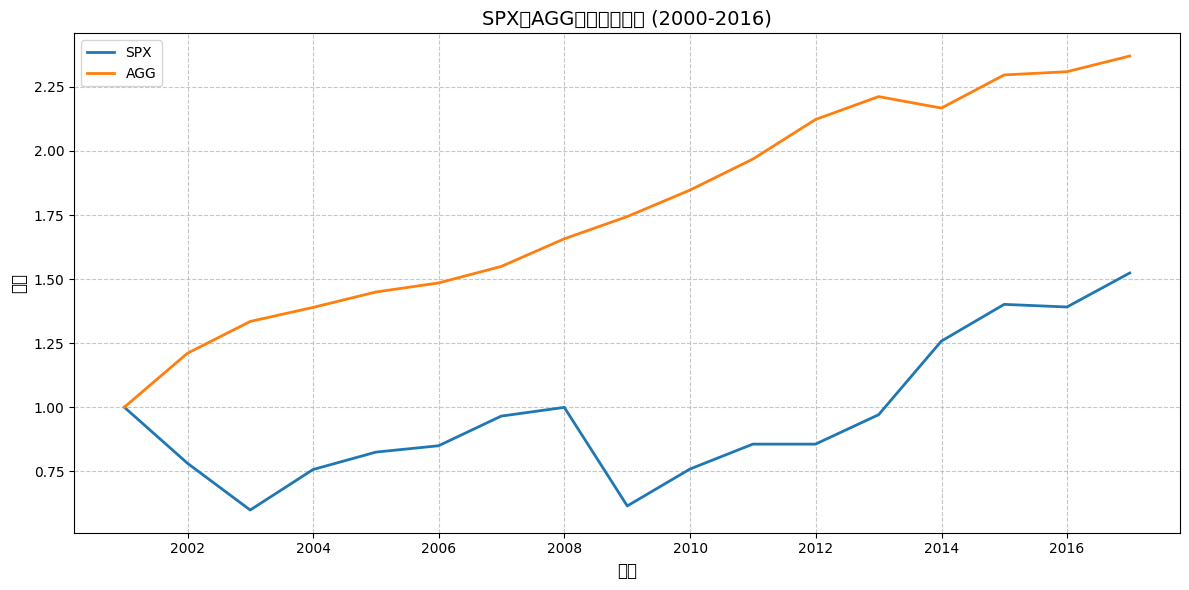

In [70]:
#ptf_1_annual 绘图，净值曲线，2000-2016

# 筛选ptf_1_annual数据，只保留2000-2016年的数据
ptf_1_annual_2000_2016 = ptf_1_annual.loc['2000-01-01':'2016-12-31']

# 计算初始净值为1的情况下的净值曲线
spx_annual_netvalue = (1 + ptf_1_annual_2000_2016['SPXret_a']).cumprod()
agg_annual_netvalue = (1 + ptf_1_annual_2000_2016['AGGret_a']).cumprod()

# 将第一个值设为1（初始值）
spx_annual_netvalue.iloc[0] = 1
agg_annual_netvalue.iloc[0] = 1

# 绘制净值曲线
plt.figure(figsize=(12, 6))
plt.plot(spx_annual_netvalue.index, spx_annual_netvalue, label='SPX', linewidth=2)
plt.plot(agg_annual_netvalue.index, agg_annual_netvalue, label='AGG', linewidth=2)

plt.title('SPX和AGG年度净值曲线 (2000-2016)', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

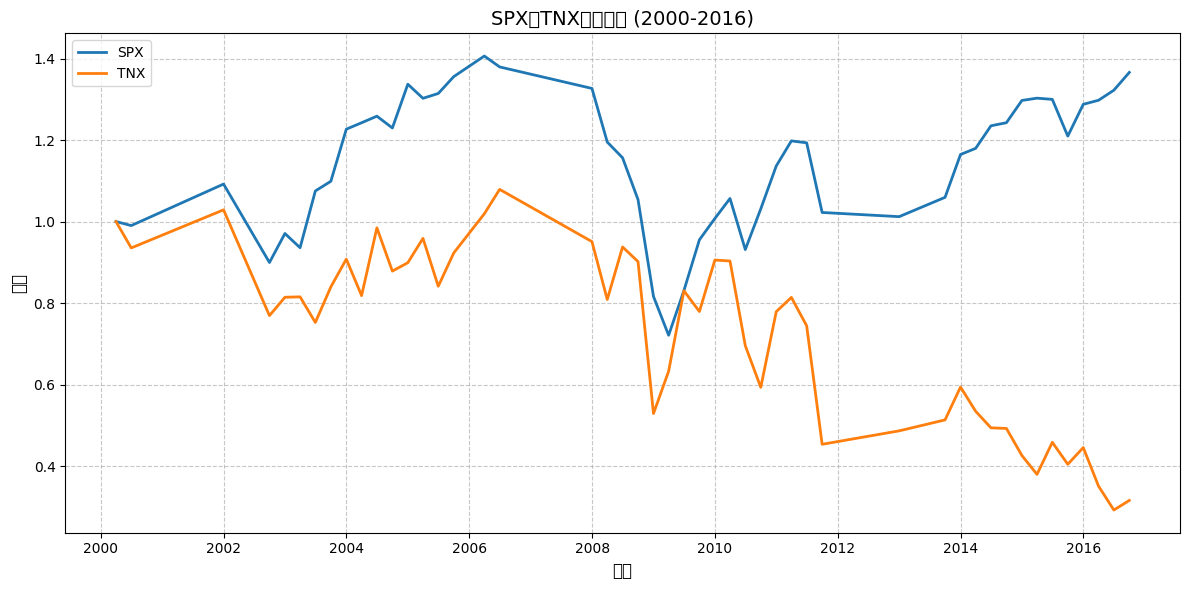

In [69]:
#ptf_2 绘图，净值曲线，2000-2016

# 筛选ptf_2_quarterly数据，只保留2000-2016年的数据
ptf_2_2000_2016 = ptf_2_quarterly.loc['2000-01-01':'2016-12-31']

# 计算初始净值为1的情况下的净值曲线
spx_netvalue = (1 + ptf_2_2000_2016['SPXret_1q']).cumprod()
tnx_netvalue = (1 + ptf_2_2000_2016['TNXret_1q']).cumprod()

# 将第一个值设为1（初始值）
spx_netvalue.iloc[0] = 1
tnx_netvalue.iloc[0] = 1

# 绘制净值曲线
plt.figure(figsize=(12, 6))
plt.plot(spx_netvalue.index, spx_netvalue, label='SPX', linewidth=2)
plt.plot(tnx_netvalue.index, tnx_netvalue, label='TNX', linewidth=2)

plt.title('SPX和TNX净值曲线 (2000-2016)', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()